In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('/content/drive/My Drive/Final_Dataset/anger001.wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


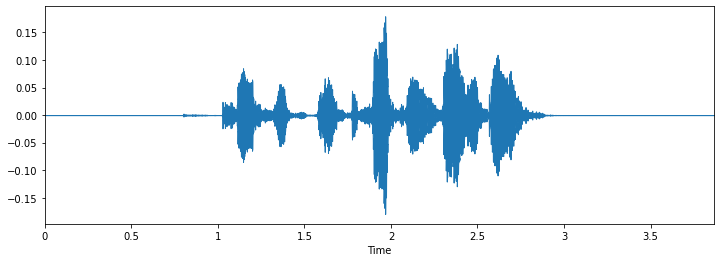

In [ ]:
% pylab inline
import os
import pandas as pd
import glob 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
import time

path = '/content/drive/My Drive/Final_Dataset/'
Y_File=[]
Y = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
    if 'anger' in file:
      Y.append(0)
      Y_File.append(os.path.join(subdir,file))
    if 'disgust' in file:
      Y.append(1)
      Y_File.append(os.path.join(subdir,file))
    if 'fear' in file:
      Y.append(2)
      Y_File.append(os.path.join(subdir,file))
    if 'happy' in file:
      Y.append(3)
      Y_File.append(os.path.join(subdir,file))
    if 'neutral' in file:
      Y.append(4)
      Y_File.append(os.path.join(subdir,file))
    if 'sad' in file:
      Y.append(5)
      Y_File.append(os.path.join(subdir,file))
    if 'surprise' in file:
      Y.append(6)
      Y_File.append(os.path.join(subdir,file))

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 0.03161501884460449 seconds ---


In [ ]:
len(Y),len(Y_File)

(2568, 2568)

In [ ]:
import time

lst = []

start_time = time.time()

for i in range(len(Y_File)):
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(Y_File[i], res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        lst.append(mfccs)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 710.3960571289062 seconds ---


In [ ]:
len(lst)

2568

In [ ]:
import pandas as pd
df = pd.DataFrame(lst)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-648.970947,71.907417,2.742204,21.670790,10.711693,8.265316,7.268557,2.156604,-6.138276,7.114227,-0.638948,2.334098,4.068620,3.934223,-0.716825,1.969140,-1.288988,-0.913698,-0.759566,2.153710,-2.214774,1.103560,-1.414614,1.267050,-0.493648,0.134097,-1.264701,1.224581,-2.835206,-0.283147,-0.060137,-0.057659,0.000561,0.087855,-1.292643,-0.410933,0.224731,-0.935340,-0.405711,-1.539037
1,-745.476807,61.395737,1.011072,12.793580,-4.854984,0.186250,-6.133131,-9.800947,-9.225055,0.980532,-5.173116,-2.589133,-9.412117,4.176839,-5.030715,-5.789496,-5.578049,-1.107720,-4.441068,-4.955767,-4.737144,-2.706756,-8.366491,-2.773106,-4.010757,-3.787622,-4.050997,-1.320769,-4.180398,-0.914175,-3.937309,-2.184175,-2.725434,-0.365667,-0.593917,2.263465,3.600143,5.182899,6.436582,6.961022
2,-694.004333,61.496510,-3.262744,16.971298,2.142968,4.266798,-5.015399,-2.617859,-12.885774,-1.302279,-1.563737,-0.917418,0.153905,-1.951386,-3.258693,1.956144,-5.813616,-2.408270,-0.432048,0.449308,-5.577334,-0.920122,-1.964510,-3.439345,-1.153978,-0.557548,-3.899142,-0.646266,-1.816866,-0.701520,-1.382858,-2.590943,-1.929074,-2.390322,-2.269381,-2.486079,-0.589257,-3.248326,-2.979813,-2.769281
3,-710.096069,40.656712,-13.243647,14.821146,-11.988942,-4.326802,-11.298809,-7.587059,-9.825305,-0.084983,-8.675142,-1.556004,-8.769038,2.118348,-9.668043,-3.032947,-5.550335,-2.129647,-3.414623,-1.301786,-0.036070,1.410935,-2.667373,1.127486,-1.977145,1.986175,4.099287,4.674964,2.503084,2.805913,-0.246652,0.444371,-0.521537,0.362264,0.854505,0.650243,-0.423510,-1.529283,-1.998029,-0.062299
4,-600.512085,73.287621,5.885289,19.855776,5.840355,-0.147993,1.414411,-2.404692,-10.087945,2.899282,-1.044273,-0.664250,-1.161344,4.153498,-1.920255,0.318724,-2.219993,0.929482,0.388972,-0.788825,-2.326617,0.063424,-2.413080,-3.108146,-1.687048,-1.630714,-2.334900,-1.168309,-0.079526,0.794789,-0.770868,-1.369582,-1.891460,-1.157018,-1.040969,-1.041425,-2.091770,-2.694788,-2.069784,-1.805427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,-578.713196,61.370003,-8.907619,21.265520,5.554171,-2.427649,-2.837762,0.677961,-12.619606,7.729056,-2.592522,-0.465079,-3.177077,3.720269,-3.148828,1.093849,-7.312330,1.868895,-4.143651,-0.830634,-4.200087,1.502687,-6.224370,-1.663106,-2.695183,-2.355363,-1.806027,-0.406772,-0.936953,-0.639671,-1.645374,-0.923842,-2.112805,-1.375529,-1.862561,-0.290023,-2.385124,-1.649704,-2.507972,-1.427291
2564,-576.611877,41.392681,-17.155254,6.986942,-9.122391,-3.664443,-20.467916,-3.572575,-14.322601,2.762153,-10.094601,-6.661758,-2.747277,-7.654290,-2.902933,-5.420545,-9.148721,-1.615915,-7.005185,-4.869830,-6.075991,-3.604834,-7.162820,-3.446610,-5.309924,0.403759,-0.442520,3.125771,4.213610,3.124016,4.282145,3.382751,3.443053,4.978160,5.427543,5.740356,4.451098,2.878379,0.935435,2.211232
2565,-513.391968,35.304344,-27.528683,-1.573403,-19.190140,-7.995622,-18.173841,-11.630806,-8.921432,-0.404055,-10.451320,0.513336,-8.950840,-2.935175,-5.182651,-6.297908,-8.257548,-5.361291,-6.544790,-0.453004,0.816983,1.280731,2.082585,1.808482,-0.245074,0.945363,0.798398,3.540350,4.012304,3.273612,2.815805,1.460280,-0.774430,0.655724,0.936522,1.376725,-0.514725,-2.646844,-2.270415,0.339581
2566,-503.895874,46.516319,-5.204802,3.634700,-7.994336,1.957494,-17.072124,-12.035769,-11.504045,-2.664160,-9.096724,-3.757857,-9.150162,-4.733320,-6.719837,0.308393,-8.646714,-2.159988,-4.451622,-3.077097,-6.187653,-3.097657,-3.816869,-3.805601,-4.331494,-1.828928,-3.806374,-0.731557,-0.000963,1.330716,1.240385,0.871198,-0.147335,-0.468855,0.425717,2.372419,0.957126,-0.369405,-0.379200,-1.097025


In [ ]:
df['labels']=Y

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,labels
0,-648.970947,71.907417,2.742204,21.670790,10.711693,8.265316,7.268557,2.156604,-6.138276,7.114227,-0.638948,2.334098,4.068620,3.934223,-0.716825,1.969140,-1.288988,-0.913698,-0.759566,2.153710,-2.214774,1.103560,-1.414614,1.267050,-0.493648,0.134097,-1.264701,1.224581,-2.835206,-0.283147,-0.060137,-0.057659,0.000561,0.087855,-1.292643,-0.410933,0.224731,-0.935340,-0.405711,-1.539037,4
1,-745.476807,61.395737,1.011072,12.793580,-4.854984,0.186250,-6.133131,-9.800947,-9.225055,0.980532,-5.173116,-2.589133,-9.412117,4.176839,-5.030715,-5.789496,-5.578049,-1.107720,-4.441068,-4.955767,-4.737144,-2.706756,-8.366491,-2.773106,-4.010757,-3.787622,-4.050997,-1.320769,-4.180398,-0.914175,-3.937309,-2.184175,-2.725434,-0.365667,-0.593917,2.263465,3.600143,5.182899,6.436582,6.961022,4
2,-694.004333,61.496510,-3.262744,16.971298,2.142968,4.266798,-5.015399,-2.617859,-12.885774,-1.302279,-1.563737,-0.917418,0.153905,-1.951386,-3.258693,1.956144,-5.813616,-2.408270,-0.432048,0.449308,-5.577334,-0.920122,-1.964510,-3.439345,-1.153978,-0.557548,-3.899142,-0.646266,-1.816866,-0.701520,-1.382858,-2.590943,-1.929074,-2.390322,-2.269381,-2.486079,-0.589257,-3.248326,-2.979813,-2.769281,4
3,-710.096069,40.656712,-13.243647,14.821146,-11.988942,-4.326802,-11.298809,-7.587059,-9.825305,-0.084983,-8.675142,-1.556004,-8.769038,2.118348,-9.668043,-3.032947,-5.550335,-2.129647,-3.414623,-1.301786,-0.036070,1.410935,-2.667373,1.127486,-1.977145,1.986175,4.099287,4.674964,2.503084,2.805913,-0.246652,0.444371,-0.521537,0.362264,0.854505,0.650243,-0.423510,-1.529283,-1.998029,-0.062299,4
4,-600.512085,73.287621,5.885289,19.855776,5.840355,-0.147993,1.414411,-2.404692,-10.087945,2.899282,-1.044273,-0.664250,-1.161344,4.153498,-1.920255,0.318724,-2.219993,0.929482,0.388972,-0.788825,-2.326617,0.063424,-2.413080,-3.108146,-1.687048,-1.630714,-2.334900,-1.168309,-0.079526,0.794789,-0.770868,-1.369582,-1.891460,-1.157018,-1.040969,-1.041425,-2.091770,-2.694788,-2.069784,-1.805427,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,-578.713196,61.370003,-8.907619,21.265520,5.554171,-2.427649,-2.837762,0.677961,-12.619606,7.729056,-2.592522,-0.465079,-3.177077,3.720269,-3.148828,1.093849,-7.312330,1.868895,-4.143651,-0.830634,-4.200087,1.502687,-6.224370,-1.663106,-2.695183,-2.355363,-1.806027,-0.406772,-0.936953,-0.639671,-1.645374,-0.923842,-2.112805,-1.375529,-1.862561,-0.290023,-2.385124,-1.649704,-2.507972,-1.427291,1
2564,-576.611877,41.392681,-17.155254,6.986942,-9.122391,-3.664443,-20.467916,-3.572575,-14.322601,2.762153,-10.094601,-6.661758,-2.747277,-7.654290,-2.902933,-5.420545,-9.148721,-1.615915,-7.005185,-4.869830,-6.075991,-3.604834,-7.162820,-3.446610,-5.309924,0.403759,-0.442520,3.125771,4.213610,3.124016,4.282145,3.382751,3.443053,4.978160,5.427543,5.740356,4.451098,2.878379,0.935435,2.211232,1
2565,-513.391968,35.304344,-27.528683,-1.573403,-19.190140,-7.995622,-18.173841,-11.630806,-8.921432,-0.404055,-10.451320,0.513336,-8.950840,-2.935175,-5.182651,-6.297908,-8.257548,-5.361291,-6.544790,-0.453004,0.816983,1.280731,2.082585,1.808482,-0.245074,0.945363,0.798398,3.540350,4.012304,3.273612,2.815805,1.460280,-0.774430,0.655724,0.936522,1.376725,-0.514725,-2.646844,-2.270415,0.339581,1
2566,-503.895874,46.516319,-5.204802,3.634700,-7.994336,1.957494,-17.072124,-12.035769,-11.504045,-2.664160,-9.096724,-3.757857,-9.150162,-4.733320,-6.719837,0.308393,-8.646714,-2.159988,-4.451622,-3.077097,-6.187653,-3.097657,-3.816869,-3.805601,-4.331494,-1.828928,-3.806374,-0.731557,-0.000963,1.330716,1.240385,0.871198,-0.147335,-0.468855,0.425717,2.372419,0.957126,-0.369405,-0.379200,-1.097025,1


In [ ]:
newDataFrame = df
newDataFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,labels
0,-648.970947,71.907417,2.742204,21.670790,10.711693,8.265316,7.268557,2.156604,-6.138276,7.114227,-0.638948,2.334098,4.068620,3.934223,-0.716825,1.969140,-1.288988,-0.913698,-0.759566,2.153710,-2.214774,1.103560,-1.414614,1.267050,-0.493648,0.134097,-1.264701,1.224581,-2.835206,-0.283147,-0.060137,-0.057659,0.000561,0.087855,-1.292643,-0.410933,0.224731,-0.935340,-0.405711,-1.539037,4
1,-745.476807,61.395737,1.011072,12.793580,-4.854984,0.186250,-6.133131,-9.800947,-9.225055,0.980532,-5.173116,-2.589133,-9.412117,4.176839,-5.030715,-5.789496,-5.578049,-1.107720,-4.441068,-4.955767,-4.737144,-2.706756,-8.366491,-2.773106,-4.010757,-3.787622,-4.050997,-1.320769,-4.180398,-0.914175,-3.937309,-2.184175,-2.725434,-0.365667,-0.593917,2.263465,3.600143,5.182899,6.436582,6.961022,4
2,-694.004333,61.496510,-3.262744,16.971298,2.142968,4.266798,-5.015399,-2.617859,-12.885774,-1.302279,-1.563737,-0.917418,0.153905,-1.951386,-3.258693,1.956144,-5.813616,-2.408270,-0.432048,0.449308,-5.577334,-0.920122,-1.964510,-3.439345,-1.153978,-0.557548,-3.899142,-0.646266,-1.816866,-0.701520,-1.382858,-2.590943,-1.929074,-2.390322,-2.269381,-2.486079,-0.589257,-3.248326,-2.979813,-2.769281,4
3,-710.096069,40.656712,-13.243647,14.821146,-11.988942,-4.326802,-11.298809,-7.587059,-9.825305,-0.084983,-8.675142,-1.556004,-8.769038,2.118348,-9.668043,-3.032947,-5.550335,-2.129647,-3.414623,-1.301786,-0.036070,1.410935,-2.667373,1.127486,-1.977145,1.986175,4.099287,4.674964,2.503084,2.805913,-0.246652,0.444371,-0.521537,0.362264,0.854505,0.650243,-0.423510,-1.529283,-1.998029,-0.062299,4
4,-600.512085,73.287621,5.885289,19.855776,5.840355,-0.147993,1.414411,-2.404692,-10.087945,2.899282,-1.044273,-0.664250,-1.161344,4.153498,-1.920255,0.318724,-2.219993,0.929482,0.388972,-0.788825,-2.326617,0.063424,-2.413080,-3.108146,-1.687048,-1.630714,-2.334900,-1.168309,-0.079526,0.794789,-0.770868,-1.369582,-1.891460,-1.157018,-1.040969,-1.041425,-2.091770,-2.694788,-2.069784,-1.805427,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,-578.713196,61.370003,-8.907619,21.265520,5.554171,-2.427649,-2.837762,0.677961,-12.619606,7.729056,-2.592522,-0.465079,-3.177077,3.720269,-3.148828,1.093849,-7.312330,1.868895,-4.143651,-0.830634,-4.200087,1.502687,-6.224370,-1.663106,-2.695183,-2.355363,-1.806027,-0.406772,-0.936953,-0.639671,-1.645374,-0.923842,-2.112805,-1.375529,-1.862561,-0.290023,-2.385124,-1.649704,-2.507972,-1.427291,1
2564,-576.611877,41.392681,-17.155254,6.986942,-9.122391,-3.664443,-20.467916,-3.572575,-14.322601,2.762153,-10.094601,-6.661758,-2.747277,-7.654290,-2.902933,-5.420545,-9.148721,-1.615915,-7.005185,-4.869830,-6.075991,-3.604834,-7.162820,-3.446610,-5.309924,0.403759,-0.442520,3.125771,4.213610,3.124016,4.282145,3.382751,3.443053,4.978160,5.427543,5.740356,4.451098,2.878379,0.935435,2.211232,1
2565,-513.391968,35.304344,-27.528683,-1.573403,-19.190140,-7.995622,-18.173841,-11.630806,-8.921432,-0.404055,-10.451320,0.513336,-8.950840,-2.935175,-5.182651,-6.297908,-8.257548,-5.361291,-6.544790,-0.453004,0.816983,1.280731,2.082585,1.808482,-0.245074,0.945363,0.798398,3.540350,4.012304,3.273612,2.815805,1.460280,-0.774430,0.655724,0.936522,1.376725,-0.514725,-2.646844,-2.270415,0.339581,1
2566,-503.895874,46.516319,-5.204802,3.634700,-7.994336,1.957494,-17.072124,-12.035769,-11.504045,-2.664160,-9.096724,-3.757857,-9.150162,-4.733320,-6.719837,0.308393,-8.646714,-2.159988,-4.451622,-3.077097,-6.187653,-3.097657,-3.816869,-3.805601,-4.331494,-1.828928,-3.806374,-0.731557,-0.000963,1.330716,1.240385,0.871198,-0.147335,-0.468855,0.425717,2.372419,0.957126,-0.369405,-0.379200,-1.097025,1


In [ ]:
import sklearn
shuffled_df = sklearn.utils.shuffle(df)
shuffled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,labels
315,-825.414673,60.533543,6.114007,22.442820,8.682250,12.127042,-7.129900,-3.363456,-2.776660,3.205381,-2.205625,3.076697,0.352401,0.712972,-3.023001,1.563250,0.166959,-1.877100,0.372673,1.767398,-1.637978,-1.397981,-4.431309,-0.144106,-2.466515,0.560809,-1.322437,-0.638741,-0.768000,-0.276426,-0.550817,-1.549996,-0.950785,-1.204997,-0.397445,-0.152079,-0.329717,-1.176098,-2.586861,-1.945768,5
300,-363.945038,132.844086,18.439739,41.831051,-1.238362,-10.838084,-2.721811,-5.487784,-14.612775,-2.332597,-1.363916,-2.175982,-2.970377,-3.081370,5.915540,2.661922,-2.749998,-2.856540,-1.961338,-5.204691,-2.508525,1.265571,-0.145492,-3.125991,-1.386497,-0.560353,-0.372894,0.948636,-1.577159,-2.073719,0.184617,0.511796,0.028943,-0.172511,0.542554,0.723892,0.219070,0.134097,0.170139,0.447085,4
2395,-465.725433,31.941385,-25.003664,4.907607,-19.889526,-9.170860,-9.586270,-7.387171,-13.214993,2.549872,-14.778431,5.845198,-7.229172,-5.142927,-1.738818,-7.529268,-5.103505,-2.644557,-5.231592,0.949450,-0.928979,0.367746,0.617664,4.046716,6.830860,9.474530,7.255089,4.313036,0.737455,-0.195848,1.585593,1.624621,0.186931,-1.141509,-1.663077,1.092556,0.946853,-0.870504,-1.804306,-0.360051,0
838,-595.746338,49.765644,-8.958530,12.199486,-3.776050,0.010150,-10.700888,-5.692644,-18.228153,0.660218,-5.705032,-3.009626,-3.356527,-3.385922,-7.317917,1.660827,-10.712868,-2.140275,-2.229816,-2.711436,-7.811651,-1.970351,-6.790730,-4.862625,-3.824659,-3.195015,-2.880560,-2.336787,-3.552398,-1.434603,-2.390821,-2.664303,-2.683732,-3.462965,-3.246841,-1.516502,0.032365,-0.552158,-0.681581,0.875309,6
676,-626.350830,61.393463,-14.373200,9.492665,-3.040496,-3.125919,-9.247561,-8.394060,-13.596136,0.447127,-8.957449,0.407861,-8.963594,-4.015021,1.375812,-5.278077,-8.105624,-0.869345,-6.277256,-1.990680,-2.267434,1.658722,-1.016263,3.804404,-0.447727,2.564703,2.049600,5.439877,6.862554,10.003140,10.753455,9.746710,5.667435,4.925363,2.985759,1.120952,1.602449,1.420502,0.355261,-1.133214,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,-625.132874,64.716370,-26.561125,19.475462,-2.377839,-10.179889,-9.272346,-11.643109,-11.622691,3.125078,-9.914325,-0.749009,-0.698782,-7.417189,-4.534481,0.047580,-13.477597,0.659697,-8.122779,-6.516964,-5.119418,-3.837847,-6.178879,-4.919551,-5.600528,0.569786,-4.730884,-0.564183,-2.898862,-3.993762,-4.394069,-0.959330,-1.092253,-0.538384,3.502781,1.669756,4.677682,6.247907,10.456415,12.188598,4
2289,-424.692383,20.815155,-28.414587,0.583950,-18.214512,-10.805991,-17.283522,-11.428418,-13.334943,-0.924081,-15.549328,5.028229,-13.622225,-1.557733,-3.454623,-8.322736,-1.618503,5.821856,5.079574,14.880066,12.842129,10.316431,2.314389,-1.028987,-4.437511,-1.516412,1.821853,2.899392,-3.779098,-4.537612,-3.470069,3.128976,1.509248,-3.425199,-2.644326,0.561523,1.497484,-2.038859,-0.212162,5.201227,0
1167,-582.898621,94.474586,22.367788,49.819572,-0.691075,0.839949,-10.800381,2.487875,-7.325592,-10.454241,-5.319189,-5.060174,-0.436529,0.662336,-0.975422,-3.178003,0.377104,0.166042,3.856387,2.266340,-3.008166,-4.696426,2.593040,-0.121497,-1.530484,0.510399,-1.604053,-0.510490,-0.786538,-0.514911,-0.980235,1.740963,2.374023,1.863116,3.787547,3.317013,2.981250,3.029734,1.917622,2.436971,2
2302,-453.688293,54.436947,-20.837057,12.399979,4.598026,-10.157798,-3.613032,5.971458,-17.891111,4.994667,-5.933625,3.367061,-3.364632,-0.197297,-1.930623,-1.551808,-6.128464,-1.747104,-5.295576,0.045491,-6.443377,-1.570445,-1.858576,-1.485167,-3.111758,-1.082204,-4.353946,-1.348092,-1.476537,0.831332,1.484614,2.430773,4.423322,2.457987,0.564883,2.526512,4.930277,8.633234,12.932058,12.609378,0


In [ ]:
X_input = shuffled_df.iloc[:,:-1]
Y_output_lables = shuffled_df.iloc[:,-1]

In [ ]:
X_input.shape,Y_output_lables.shape

((2568, 40), (2568,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_input, Y_output_lables, test_size=0.25, random_state=42)

In [ ]:
X_train.shape,y_train.shape

((1926, 40), (1926,))

In [ ]:
X_test.shape,y_test.shape

((642, 40), (642,))

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape, x_testcnn.shape

((1926, 40, 1), (642, 40, 1))

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

modelNN3 = Sequential()

modelNN3.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
modelNN3.add(Activation('relu'))
modelNN3.add(Dropout(0.1))
modelNN3.add(MaxPooling1D(pool_size=(8)))

modelNN3.add(Conv1D(256, 5,padding='same',))
modelNN3.add(Activation('relu'))
modelNN3.add(Dropout(0.1))

modelNN3.add(Flatten())
modelNN3.add(Dense(7))
modelNN3.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, rho=0.9, epsilon=None, decay=0.0)

In [ ]:
modelNN3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 40, 128)           768       
_________________________________________________________________
activation_12 (Activation)   (None, 40, 128)           0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 5, 256)            164096    
_________________________________________________________________
activation_13 (Activation)   (None, 5, 256)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 256)           

In [ ]:
modelNN3.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
modelCNNhistory3=modelNN3.fit(x_traincnn, y_train, batch_size=16, epochs=1000, validation_data=(x_testcnn, y_test))

Epoch 1/1000
121/121 [==============================] - 3s 16ms/step - loss: 15.2381 - accuracy: 0.1490 - val_loss: 2.1492 - val_accuracy: 0.1916
Epoch 2/1000
121/121 [==============================] - 2s 15ms/step - loss: 5.3008 - accuracy: 0.1517 - val_loss: 2.2161 - val_accuracy: 0.1838
Epoch 3/1000
121/121 [==============================] - 2s 15ms/step - loss: 5.1012 - accuracy: 0.1595 - val_loss: 2.1041 - val_accuracy: 0.2181
Epoch 4/1000
121/121 [==============================] - 2s 15ms/step - loss: 4.9724 - accuracy: 0.1822 - val_loss: 1.9249 - val_accuracy: 0.2492
Epoch 5/1000
121/121 [==============================] - 2s 15ms/step - loss: 4.6950 - accuracy: 0.1819 - val_loss: 1.9453 - val_accuracy: 0.2726
Epoch 6/1000
121/121 [==============================] - 2s 15ms/step - loss: 4.5822 - accuracy: 0.1782 - val_loss: 1.8393 - val_accuracy: 0.2477
Epoch 7/1000
121/121 [==============================] - 2s 14ms/step - loss: 4.3815 - accuracy: 0.1909 - val_loss: 1.8486 - val_a

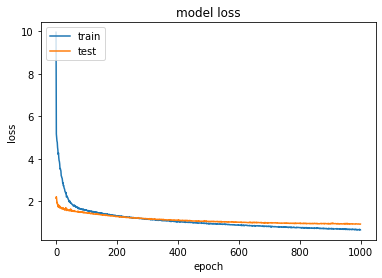

In [ ]:
plt.plot(modelCNNhistory3.history['loss'])
plt.plot(modelCNNhistory3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

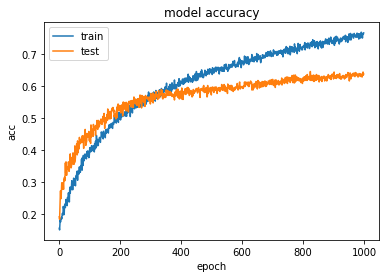

In [ ]:
plt.plot(modelCNNhistory3.history['accuracy'])
plt.plot(modelCNNhistory3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
predictions = modelNN3.predict_classes(x_testcnn)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
predictions

array([5, 2, 2, 5, 1, 2, 5, 1, 0, 5, 4, 0, 6, 2, 2, 6, 5, 1, 2, 1, 0, 1,
       0, 5, 0, 5, 5, 5, 1, 2, 4, 5, 5, 3, 5, 2, 6, 1, 1, 1, 4, 4, 2, 5,
       6, 4, 3, 0, 1, 2, 1, 6, 0, 0, 1, 1, 5, 0, 0, 2, 2, 0, 3, 5, 0, 1,
       5, 5, 4, 4, 1, 3, 5, 2, 0, 2, 2, 0, 3, 6, 2, 2, 2, 2, 4, 5, 5, 0,
       4, 3, 6, 5, 2, 0, 3, 1, 5, 3, 0, 3, 0, 2, 2, 5, 0, 2, 3, 1, 2, 2,
       4, 0, 3, 3, 5, 0, 1, 6, 0, 6, 2, 4, 5, 2, 5, 4, 0, 6, 4, 4, 5, 0,
       5, 2, 6, 5, 3, 1, 4, 6, 2, 5, 2, 6, 5, 2, 5, 4, 6, 5, 5, 5, 1, 0,
       5, 0, 2, 2, 6, 5, 1, 1, 1, 1, 0, 6, 2, 1, 1, 2, 1, 3, 2, 2, 3, 2,
       2, 5, 6, 1, 3, 3, 5, 1, 5, 0, 4, 3, 4, 3, 3, 3, 2, 1, 3, 2, 4, 1,
       2, 4, 3, 5, 5, 4, 2, 3, 5, 5, 5, 2, 2, 0, 0, 1, 0, 1, 2, 5, 4, 3,
       2, 2, 0, 2, 0, 6, 0, 4, 2, 6, 3, 1, 3, 3, 6, 2, 5, 5, 2, 2, 2, 5,
       1, 2, 2, 0, 2, 3, 0, 2, 6, 1, 5, 3, 4, 5, 0, 2, 6, 6, 0, 3, 3, 2,
       2, 1, 0, 6, 4, 0, 3, 0, 5, 2, 4, 6, 0, 5, 6, 4, 3, 2, 1, 5, 2, 6,
       4, 6, 0, 3, 5, 0, 4, 3, 2, 1, 6, 5, 4, 5, 2,

In [ ]:
y_test

1399    2
312     5
1513    2
681     5
717     5
       ..
1345    2
2043    0
254     4
751     5
1992    4
Name: labels, Length: 642, dtype: int64

In [ ]:
new_Ytest = y_test.astype(int)

In [ ]:
new_Ytest

1399    2
312     5
1513    2
681     5
717     5
       ..
1345    2
2043    0
254     4
751     5
1992    4
Name: labels, Length: 642, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.70      0.73       109
           1       0.51      0.56      0.53        57
           2       0.64      0.61      0.62       125
           3       0.80      0.64      0.71       114
           4       0.69      0.69      0.69        70
           5       0.53      0.58      0.55       109
           6       0.50      0.71      0.59        58

    accuracy                           0.64       642
   macro avg       0.63      0.64      0.63       642
weighted avg       0.65      0.64      0.64       642



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

#0:Anger #1:Disgust #2:Fear #3:Happy #4:Neutral #5:Sad #6:Surprise

[[76 13  4  5  2  2  7]
 [ 4 32  3  2  6  5  5]
 [ 7  1 76  3  3 23 12]
 [ 7  1 12 73  3  7 11]
 [ 0  2  3  0 48 14  3]
 [ 4  8 19  5  7 63  3]
 [ 0  6  2  3  1  5 41]]


In [ ]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = '/content/drive/My Drive/Audio_Model'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
modelNN3.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Audio_Model/Emotion_Voice_Detection_Model.h5 


In [ ]:
loaded_model = keras.models.load_model('/content/drive/My Drive/Audio_Model/Emotion_Voice_Detection_Model.h5')
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 40, 128)           768       
_________________________________________________________________
activation_12 (Activation)   (None, 40, 128)           0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 5, 256)            164096    
_________________________________________________________________
activation_13 (Activation)   (None, 5, 256)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 256)           

In [ ]:
loss, acc = loaded_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

21/21 [==============================] - 0s 3ms/step - loss: 0.9305 - accuracy: 0.6371
Restored model, accuracy: 63.71%
